# Drawing Conclusions Example
Using descriptive statistics to answer some questions from the `cancer_data_edited.csv` dataset.  
The question to solve for: Does the size of a tumor affect its malignancy? We'll create a layered histogram to better understand the differences between malignant and benign diagnosis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load the dataset
df = pd.read_csv('cancer_data_edited.csv')
df.head()

,id,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
0,842302,M,17.99,19.293431,122.80,1001.0,0.118400,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.770000,132.90,1326.0,0.084740,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.250000,130.00,1203.0,0.109600,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.380000,77.58,386.1,0.096087,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.340000,135.10,1297.0,0.100300,0.13280,0.1980,0.10430,0.1809,0.05883


In [3]:
# Example of using a mask to filter our data
mask = df['diagnosis'] == 'M'
print(mask)

0       True
1       True
2       True
3       True
4       True
       ...  
559     True
560     True
561     True
562     True
563    False
Name: diagnosis, Length: 564, dtype: bool


In [4]:
# Creating a sub dataset for malignant diagnosis
df_m = df[df['diagnosis'] == 'M']
df_m.head()

,id,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
0,842302,M,17.99,19.293431,122.80,1001.0,0.118400,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.770000,132.90,1326.0,0.084740,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.250000,130.00,1203.0,0.109600,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.380000,77.58,386.1,0.096087,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.340000,135.10,1297.0,0.100300,0.13280,0.1980,0.10430,0.1809,0.05883


In [5]:
# Summary statistics, take a look at the mean
df_m['area'].describe()

count     210.000000
mean      976.582857
std       365.494289
min       361.600000
25%       706.850000
50%       932.000000
75%      1200.750000
max      2501.000000
Name: area, dtype: float64

In [6]:
# Creating a sub dataset for benign diagnosis
df_b = df[df['diagnosis'] == 'B']
# Create the same summary stats
df_b['area'].describe()

count    354.000000
mean     462.712429
std      134.769158
min      143.500000
25%      374.975000
50%      458.150000
75%      551.550000
max      992.100000
Name: area, dtype: float64

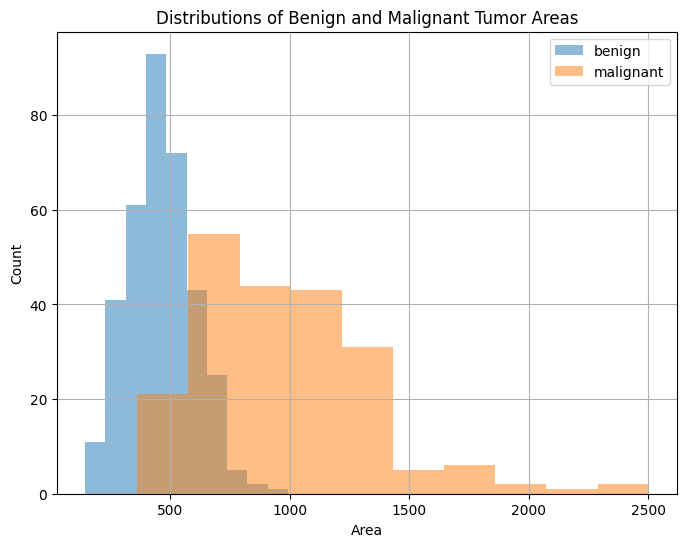

In [7]:
# Create a histogram plot
# .hist() returns a matplotlib subplot
# alpha changes it's transparency
# figsize changes the figure size
ax = df_b['area'].hist(alpha=0.5, figsize=(8, 6), label='benign');
# Layer a new histogram using the same subplot that was returned as 'ax'
df_m['area'].hist(alpha=0.5, figsize=(8, 6), label='malignant', ax=ax);
# Label the subplot with titles and a legend
ax.set_title('Distributions of Benign and Malignant Tumor Areas')
ax.set_xlabel('Area');
ax.set_ylabel('Count');
ax.legend(loc='upper right');